# Problem 2 — Quantization / False Contouring

This notebook cell implements the monotonicity transformation to quantize the grayscale Lena image into the following output pixel ranges:

- {0,1,2,…,63} (64 levels)
- {0,1,2,…,31} (32 levels)
- {0,1,2,…,15} (16 levels)
- {0,1,2,…,7}  (8 levels)
- {0,1,2,3}    (4 levels)

The code uses OpenCV (`cv2`) to read the image `Lena.png` (expected to be in the notebook's working directory), converts it to grayscale, applies the monotonic quantization, and displays the results side-by-side. It also prints the actual unique values present in each quantized image to confirm the ranges.

Levels 64: unique values count = 56, min=6, max=61
Levels 32: unique values count = 28, min=3, max=30
Levels 16: unique values count = 15, min=1, max=15
Levels 8: unique values count = 8, min=0, max=7
Levels 4: unique values count = 4, min=0, max=3


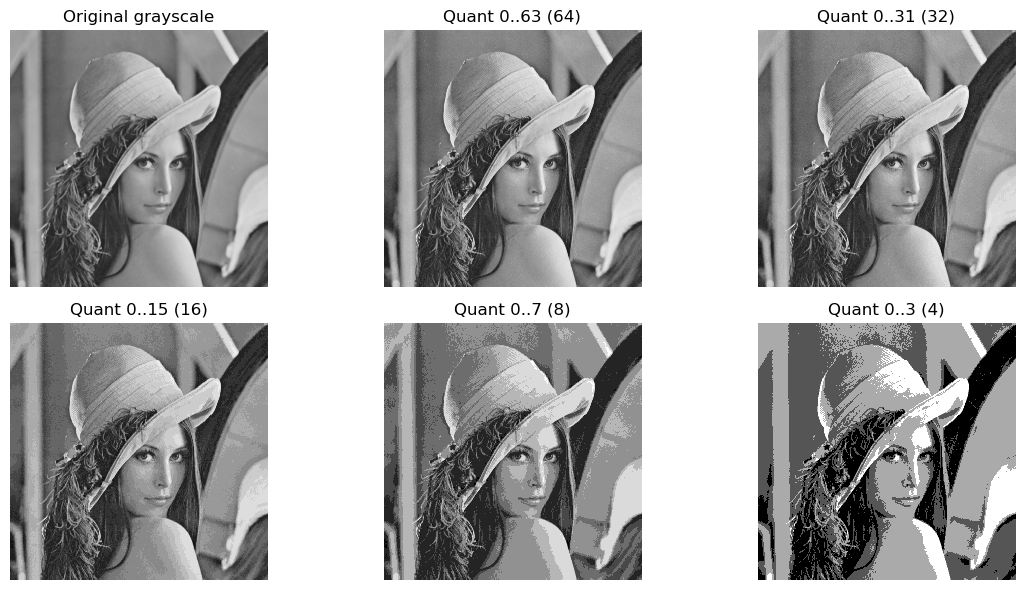

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read Lena.png (must be in same folder as the notebook)
img = cv2.imread('Lena.png', cv2.IMREAD_COLOR)
if img is None:
    raise FileNotFoundError("Lena.png not found in the notebook working directory. Make sure it's placed next to this notebook.")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Monotonic quantization function: map 0..255 -> 0..(levels-1)
def quantize_monotonic(img_gray, levels):
    # Using integer arithmetic to ensure values are in exact range 0..levels-1
    q = (img_gray.astype(np.int32) * levels) // 256
    return q.astype(np.uint8)

levels_list = [64, 32, 16, 8, 4]
quant_images = [quantize_monotonic(gray, L) for L in levels_list]

# For visualization we stretch quantized values back to 0..255 (so contours are visible)
def scale_for_display(qimg):
    L = int(qimg.max()) + 1
    if L <= 1:
        return (qimg * 255).astype(np.uint8)
    return (qimg.astype(np.float32) * (255.0 / (L - 1))).astype(np.uint8)

display_images = [scale_for_display(q) for q in quant_images]

# Plot original grayscale and the quantized images
titles = ['Original grayscale', 'Quant 0..63 (64)', 'Quant 0..31 (32)', 'Quant 0..15 (16)', 'Quant 0..7 (8)', 'Quant 0..3 (4)']
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.title(titles[0])
plt.axis('off')

for i, imgd in enumerate(display_images, start=2):
    plt.subplot(2, 3, i)
    plt.imshow(imgd, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    plt.title(titles[i - 1])
    plt.axis('off')

plt.tight_layout()

# Print unique values to confirm the exact quantized ranges
for L, q in zip(levels_list, quant_images):
    uniques = np.unique(q)
    print(f"Levels {L}: unique values count = {len(uniques)}, min={uniques.min()}, max={uniques.max()}")
